# Montecarlo Demo

Kate Meldrum

In [25]:
from montecarlo import *
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Senario 1: 

1. Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [2]:
fair = die(['H','T'])
unfair = die(['H','T'])
unfair.change_weight('H', 5)
print("Fair Coin:\n", fair.display())
print("Unfair Coin:\n", unfair.display())

Fair Coin:
    Weight
H     1.0
T     1.0
Unfair Coin:
    Weight
H     5.0
T     1.0


2. Play a game of 1000 flips with all fair dice

3. Play a game of 1000 flips with two unfair dice and one fair die.

In [3]:
fairgame = game([fair,fair, fair])
unfairgame = game([unfair,unfair, fair])
fairgame.play(1000)
unfairgame.play(1000)
print("Fair Game: \n", fairgame.show_rolls())
print("Unfair Game: \n", unfairgame.show_rolls())

Fair Game: 
      Die 1 Die 2 Die 3
1        T     H     H
2        T     H     H
3        H     H     H
4        H     H     H
5        H     H     T
...    ...   ...   ...
996      H     T     T
997      H     H     H
998      H     H     H
999      H     H     T
1000     H     H     T

[1000 rows x 3 columns]
Unfair Game: 
      Die 1 Die 2 Die 3
1        T     H     T
2        H     H     H
3        T     H     T
4        H     T     H
5        T     H     T
...    ...   ...   ...
996      H     T     H
997      T     H     H
998      H     H     T
999      H     H     T
1000     H     H     T

[1000 rows x 3 columns]


4. For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.

In [4]:
fairan = analyzer(fairgame)
unfairan = analyzer(unfairgame)
fj = fairan.jackpot()
uj = unfairan.jackpot()
print("Fair game jackpots: ", fj);
print("Unfair game jackpots: ", uj);

Fair game jackpots:  244
Unfair game jackpots:  364


5. Compute relative frequency as the number of jackpots over the total number of rolls.

In [5]:
print("Relative frequency of fair game jackpots: ", fj/1000)
print("Relative frequency of unfair game jackpots: ", uj/1000)

Relative frequency of fair game jackpots:  0.244
Relative frequency of unfair game jackpots:  0.364


6. Show your results, comparing the two relative frequencies, in a simple bar chart.

In [6]:
import matplotlib.pyplot as plot

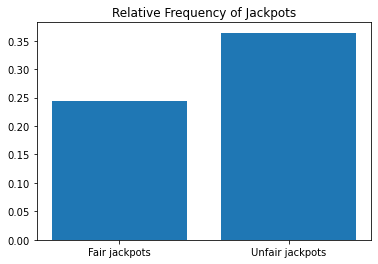

In [7]:
plot.bar(["Fair jackpots","Unfair jackpots"],[(fj/1000), (uj/1000)])
plot.title("Relative Frequency of Jackpots");

## Senario 2:

1. Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.

In [8]:
fair = die([1,2,3,4,5,6])
unfair1 = die([1,2,3,4,5,6])
unfair1.change_weight(6, 5)
unfair2 = die([1,2,3,4,5,6])
unfair2.change_weight(1,5)
print(fair.display())
print(unfair1.display())
print(unfair2.display())

   Weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
   Weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     5.0
   Weight
1     5.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0


2. Play a game of 10000 rolls with 5 fair dice.

In [9]:
fairgame=game([fair, fair, fair, fair, fair])
fairgame.play(10000)
print("Fair game: \n", fairgame.show_rolls())

Fair game: 
        Die 1  Die 2  Die 3  Die 4  Die 5
1          1      2      5      1      3
2          6      6      1      5      2
3          5      5      2      5      6
4          1      6      3      4      1
5          1      3      3      6      5
...      ...    ...    ...    ...    ...
9996       6      5      5      6      6
9997       5      3      5      5      4
9998       4      2      5      1      5
9999       1      5      1      2      4
10000      3      1      3      6      5

[10000 rows x 5 columns]


3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.


In [10]:
unfairgame=game([unfair1, unfair1, unfair2, fair, fair])
unfairgame.play(10000)
print("Unfair game: \n", unfairgame.show_rolls())

Unfair game: 
        Die 1  Die 2  Die 3  Die 4  Die 5
1          2      5      6      4      2
2          6      5      5      2      5
3          6      6      1      2      3
4          6      6      4      6      3
5          3      6      3      3      3
...      ...    ...    ...    ...    ...
9996       6      2      6      3      6
9997       6      2      1      2      3
9998       5      6      5      5      3
9999       1      6      1      6      5
10000      4      6      1      4      6

[10000 rows x 5 columns]


4. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

In [11]:
fairanalyzer = analyzer(fairgame)
unfairanalyzer = analyzer(unfairgame)

In [12]:
fj = fairanalyzer.jackpot()
print("Relative frequency of fair game jackpots:", fj/10000)

Relative frequency of fair game jackpots: 0.0007


In [13]:
uj = unfairanalyzer.jackpot()
print("Relative frequency of unfair game jackpots:", uj/10000)

Relative frequency of unfair game jackpots: 0.0014


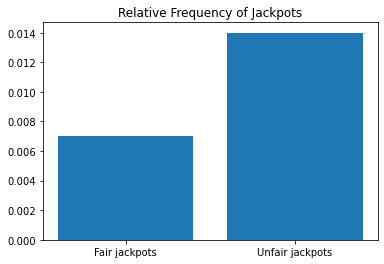

In [14]:
plot.bar(["Fair jackpots","Unfair jackpots"],[(fj/1000), (uj/1000)])
plot.title("Relative Frequency of Jackpots");

5. Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

In [15]:
ftt=fairanalyzer.most_frequent(10)
utt=unfairanalyzer.most_frequent(10)

Fair Die:


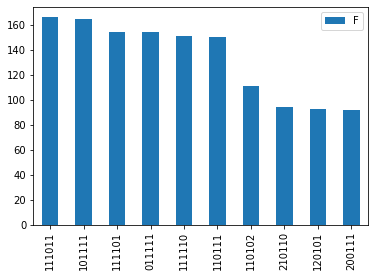

In [16]:
print('Fair Die:')
ftt.plot.bar();


Unfair Die:


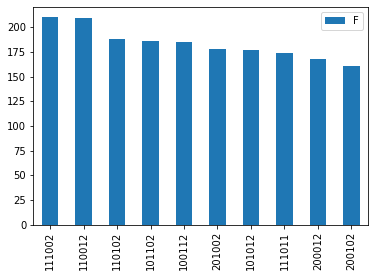

In [17]:
print('Unfair Die:')
utt.plot.bar();

note that these six character numerics represent frequencies of faces in each roll, for example:

'100103' contains the numbers [1,4,6,6,6]

## Senario 3:

1. Create a "die" of letters from a to z with weights based on their frequency of usage.

In [18]:
alpha = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
die = die(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])

In [19]:
freq = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902, 1.7779, 0.2722]
for i in range(0,26):
    die.change_weight(alpha[i], freq[i])
die.display()

,Weight
a,8.4966
b,2.0720
c,4.5388
d,3.3844
e,11.1607
f,1.8121
g,2.4705
h,3.0034
i,7.5448
j,0.1965


2. Play a game involving 5 of these dice with 1000 rolls.

In [20]:
game = game([die,die,die,die,die])
game.play(1000)
df = game.show_rolls()
df 

,Die 1,Die 2,Die 3,Die 4,Die 5
1,d,c,c,u,e
2,n,d,o,e,e
3,e,d,e,t,e
4,p,c,a,e,e
5,p,p,l,i,e
...,...,...,...,...,...
996,i,d,i,m,a
997,i,d,i,i,e
998,l,o,a,o,y
999,n,n,a,a,m


3. How many combos can you that look like actual English words? ← NOTE: "combo" here just means resulting sequence, not literally combination as opposed to permutation.

In [21]:
rolls_lst = []
for i in range(len(df)):   
    rolls_lst.append(''.join(list(df.iloc[i,:])))

In [22]:
from scrab import scrab_words_5l
real_words = []
for roll in rolls_lst:
    if roll in scrab_words_5l:
        real_words.append(roll)
print(real_words)

['suras', 'tiers']


4. Based on your eye count, what is the relative frequency of these words versus the rest?


In [23]:
print("Relative Frequency: ", len(real_words)/1000)

Relative Frequency:  0.002
